In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('E:/Data Science/Competitions/data/loan prediction')

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore',category= DataConversionWarning)
warnings.simplefilter(action='ignore',category=FutureWarning)

### Reading the train and test data

In [3]:
df_train = pd.read_csv('train_loan.csv')

In [4]:
df_test = pd.read_csv('test_loan.csv')

In [5]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
print('Train data shape ',df_train.shape)
print('Test data shape ',df_test.shape)

Train data shape  (614, 13)
Test data shape  (367, 12)


In [8]:
# concatenating train and test

df_train['data'] = 'train'
df_test['data'] = 'test'
df_test['Loan_Status'] = 0

df = pd.concat([df_train,df_test],axis=0,ignore_index=True,sort=False)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train


In [9]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,0,test
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,0,test
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,0,test
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,0,test
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,0,test


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
data                  object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null object
data                 981 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


In [14]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [15]:
cat_cols =  list(df.select_dtypes(include='object').columns)
cat_cols.remove('Loan_ID')

In [16]:
cat_cols.remove('data')

In [17]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Exploratory Data Analysis

#### Univariate analysis

C:\Users\Ankita\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ankita\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


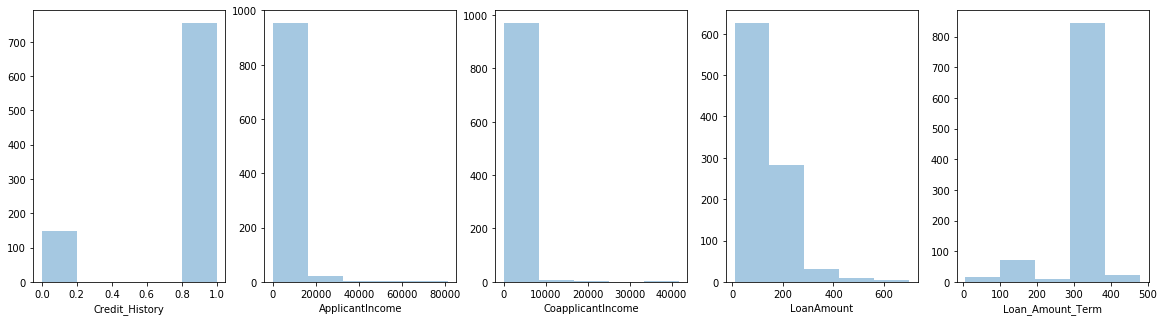

In [18]:
fig = plt.figure(figsize=(20,5))

for i in range(0,len(num_cols)):
    fig.add_subplot(1,len(num_cols),i+1)
    sns.distplot(df[num_cols[i-1]],kde=False,bins=5)

plt.show()

### Observations
Credit history has 2 values 0 and 1, can be considered as categorical feature

Applicant Income
- observed to have values between 0 and 18000, a few of the customers seem to have income above 20000

Coapplicant Income
- observed to have values between 0 to 10000, few of them have higher than 10000

Loan Amount
- most of them are between 9000 to 200000

Loan Amount Term
- most of them come under 300 to 360 months 

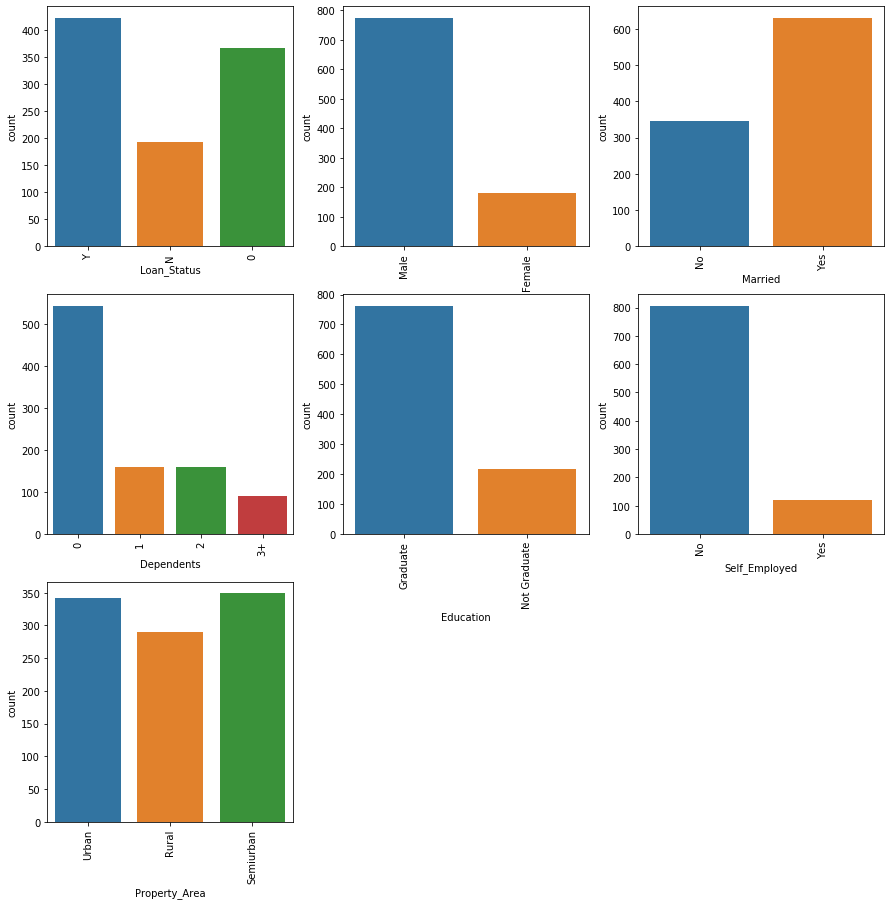

In [19]:
fig = plt.figure(figsize=(15,15))

for i in range(0,len(cat_cols)):
    fig.add_subplot(3,3,i+1)
    sns.countplot(df[cat_cols[i-1]])
    plt.xticks(rotation=90)
plt.show()

- males mostly apply for loan than females
- Married ones are likely to apply for loan
- Individuals having no Dependents seems to be applying for loan
- More graduates are applying for loan
- Self-employed people are less likely to apply for loan
- Most of the individuals applying for loan come from Semiurban area
- Loan Status is slightly imbalanced, need to balance the data 

#### Bivariate Analysis

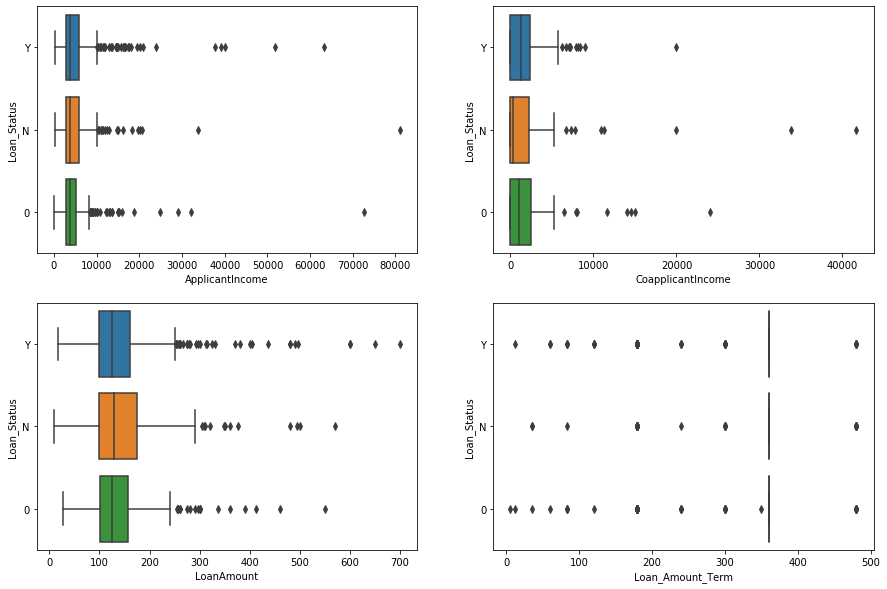

In [20]:
fig = plt.figure(figsize=(15,10))

for i in range(1,len(num_cols)):
    fig.add_subplot(2,2,i)
    sns.boxplot(x=df[num_cols[i-1]] , y = df['Loan_Status'])

plt.show()

- even though Applicant Income and coapplicant income is higher loan may not get approved due to some or other reasons
- Higher Loan Amount is likely to get rejected as the applicant may not be fit in the criteria for loan
- Loan Amount term does not affect the approval of loan

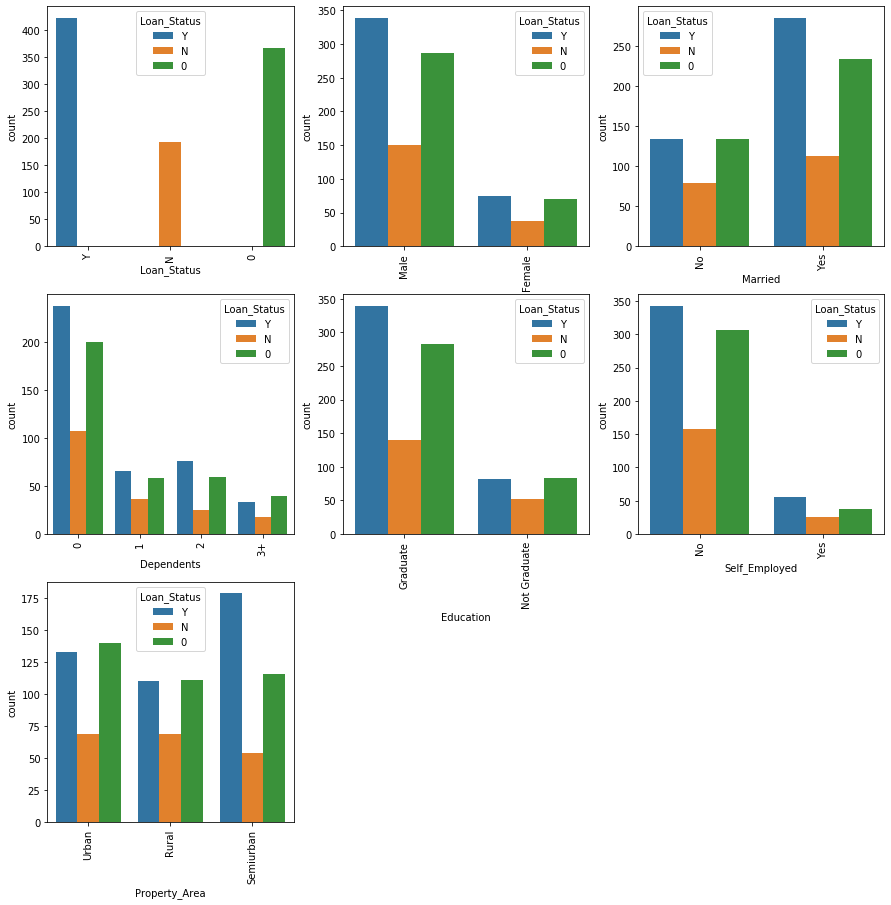

In [21]:
fig = plt.figure(figsize=(15,15))

for i in range(0,len(cat_cols)):
    fig.add_subplot(3,3,i+1)
    sns.countplot(df[cat_cols[i-1]], hue = df['Loan_Status'])
    plt.xticks(rotation=90)
plt.show()

In [24]:
# converting credit_history column to categorical as it has only 2 values

df['Credit_History'] = df['Credit_History'].replace({0:'0',1:'1'})

In [25]:
num_cols = df.select_dtypes(exclude='object').columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [26]:
# categorical variables
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status',
       'data'],
      dtype='object')

In [27]:
unique_vals_cat = {}
unique_vals_num = {}
for col in cat_cols:
    unique_vals_cat.update({col:df[col].unique()})
    
print(pd.Series(unique_vals_cat))

for col in num_cols:
    unique_vals_num.update({col:df[col].value_counts().index})
    
print(pd.Series(unique_vals_num))

Loan_ID           [LP001002, LP001003, LP001005, LP001006, LP001...
Gender                                          [Male, Female, nan]
Married                                              [No, Yes, nan]
Dependents                                       [0, 1, 2, 3+, nan]
Education                                  [Graduate, Not Graduate]
Self_Employed                                        [No, Yes, nan]
Credit_History                                          [1, 0, nan]
Property_Area                             [Urban, Rural, Semiurban]
Loan_Status                                               [Y, N, 0]
data                                                  [train, test]
dtype: object
ApplicantIncome      Int64Index([ 2500,  5000,  3333,  3500,  2600,...
CoapplicantIncome    Float64Index([   0.0, 2500.0, 2083.0, 2000.0, ...
LoanAmount           Float64Index([120.0, 110.0, 100.0, 187.0, 150....
Loan_Amount_Term     Float64Index([360.0, 180.0, 480.0, 300.0, 240....
dtype: object


# checking for missing and null values

In [29]:
df.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
data                  0
dtype: int64

# Treating the missing and null values

In [30]:
# filling the null values as median as the data is highly skewed which indicates that mean would be high so cannot use mean

df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [31]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [32]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
data                 0
dtype: int64

In [33]:
df['Dependents'] = df['Dependents'].str.replace('+','')

In [34]:
df.shape

(981, 14)

#### Dealing with categorical data

In [35]:
df['Gender'] = df['Gender'].replace({'Male':1,'Female':0})
df['Married'] = df['Married'].replace({'Yes':1,'No':0})
df['Education'] = df['Education'].replace({'Graduate':1,'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes':1,'No':0})
df['Property_Area'] = df['Property_Area'].replace({'Urban':1,'Rural':0,'Semiurban':2})

In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,data
0,LP001002,1,0,0,1,0,5849,0.0,126.0,360.0,1,1,Y,train
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,N,train
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1,1,Y,train
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1,1,Y,train
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1,1,Y,train


In [27]:
# df = pd.get_dummies(df,columns = ['Gender','Married','Education','Self_Employed','Dependents','Credit_History','Property_Area'], prefix = ['G','M','E','SE','D','CH','PA'], drop_first = True)

In [38]:
df.shape

(981, 14)

In [62]:
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1,'N':0})

### Separating the test and train data

In [81]:
train = df[df['data']=='train']

test = df[df['data']=='test']

In [82]:
X = train.drop(['data','Loan_Status','Loan_ID'],axis = 1)

In [83]:
Y = train['Loan_Status']

In [84]:
test = test.drop(['data','Loan_Status','Loan_ID'],axis = 1)

### Importing the models

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.feature_selection import RFECV

from sklearn.model_selection import GridSearchCV, validation_curve, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, f1_score,roc_auc_score, roc_curve, auc,precision_score,recall_score
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning) # ignore all future warnings

In [86]:
# train test split
def perform_train_test_split(x,y,size):
    return train_test_split(x, y, test_size = size, random_state = 0)


# function for scaling the data for train test split
def std_data(xtrain,xtest):
    sc = StandardScaler()
    scaled = sc.fit(xtrain)
    scaled_train = sc.transform(xtrain)
    scaled_test = sc.transform(xtest)
    return scaled_train, scaled_test


# function to standardize the data
def std_all_data(x):
    sc = StandardScaler()
    scaled = sc.fit_transform(x)
    return scaled


# function for applying grid search cv
def grid_search_cv(x,y,model,params):
    GS = GridSearchCV(model, params, cv = 5, scoring = 'roc_auc')
    GS.fit(x,y)
    return GS.best_params_, GS.best_estimator_, GS.best_score_, GS.cv_results_

# function for applying random search cv
def random_search_cv(x,y,model,params):
    RS = RandomizedSearchCV(model, params, cv = 5, scoring = 'roc_auc', random_state = 0)
    RS.fit(x,y)
    return RS.best_params_, RS.best_estimator_, RS.best_score_, RS.cv_results_

# function to fit the model, predict the labels, obtain different metrics and plot roc auc curve
def fit_predict(xtrain,xtest,ytrain,ytest,models):
    
    for name, model in models:
        
        model.fit(xtrain,ytrain)
        y_pred_train = model.predict(xtrain)
        y_pred_test = model.predict(xtest)

        probas_train = model.predict_proba(xtrain)[:,1]
        probas_test = model.predict_proba(xtest)[:,1]
        
        print('\n Train classification report:\n', classification_report(ytrain,y_pred_train))
        print('\n Test classification report:\n', classification_report(ytest,y_pred_test))
        
        print('\n Train confusion matrix:\n', confusion_matrix(ytrain,y_pred_train))
        print('\n Test confusion matrix:\n', confusion_matrix(ytest,y_pred_test))

        fpr_train, tpr_train, thresholds_train = roc_curve(y_train,probas_train)

        fpr_test, tpr_test, thresholds_test = roc_curve(y_test,probas_test)

        
        plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
        plt.plot(fpr_train, tpr_train, color='b', 
                 label=r'Train ROC (AUC = %0.2f )' % (roc_auc_score(y_train,probas_train)),lw=2, alpha=.5)
        plt.plot(fpr_test, tpr_test, color='g', 
                 label=r'Test ROC (AUC = %0.2f )' % (roc_auc_score(y_test,probas_test)),lw=2, alpha=.8)

        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.xlabel('False Positive Rate',fontsize=10)
        plt.ylabel('True Positive Rate',fontsize=10)
        plt.title('ROC of %s' % (name),fontsize=10)
        plt.legend(loc="lower right", prop={'size': 9})
        plt.show()



final = {}
results = []
names = []
auc = []

# function to apply cross validation on models build 
def implement_cv(x,y,models):
    for name,model in models:
        kfold = model_selection.KFold(shuffle=True,n_splits=5,random_state=0)
        cv_results = model_selection.cross_validate(model,x,y,cv=kfold, scoring='roc_auc', return_train_score = True)
        auc.append(np.mean(cv_results['test_score']))
        names.append(name)
        print(cv_results['train_score'],cv_results['test_score'])

## Train Test Split

In [87]:
X_train, X_test, y_train, y_test = perform_train_test_split(X,Y,0.3)
scaled_train, scaled_test = std_data(X_train, X_test)

###  Base Model


 Train classification report:
               precision    recall  f1-score   support

           0       0.93      0.44      0.60       141
           1       0.78      0.98      0.87       288

    accuracy                           0.80       429
   macro avg       0.85      0.71      0.73       429
weighted avg       0.83      0.80      0.78       429


 Test classification report:
               precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185


 Train confusion matrix:
 [[ 62  79]
 [  5 283]]

 Test confusion matrix:
 [[ 22  29]
 [  2 132]]


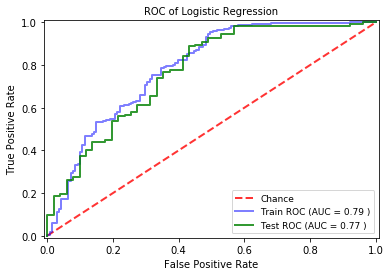

In [88]:

LOGR = LogisticRegression(random_state=0)

models = []
models.append(('Logistic Regression', LOGR))

fit_predict(scaled_train, scaled_test, y_train, y_test,models)


#### This is a underfit model as the train accuracy is less than test accuracy.
- It has high bias and low variance
- Other classifiers like decision tree can be used
- Boosting an Ensemble technique can be used to reduce this bias


 Train classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       288

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


 Test classification report:
               precision    recall  f1-score   support

           0       0.55      0.53      0.54        51
           1       0.82      0.84      0.83       134

    accuracy                           0.75       185
   macro avg       0.69      0.68      0.68       185
weighted avg       0.75      0.75      0.75       185


 Train confusion matrix:
 [[141   0]
 [  0 288]]

 Test confusion matrix:
 [[ 27  24]
 [ 22 112]]


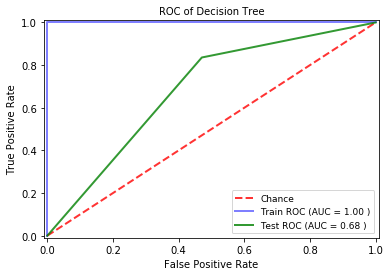

In [89]:
DT = DecisionTreeClassifier(random_state=0)

models = []
models.append(('Decision Tree', DT))

fit_predict(scaled_train, scaled_test, y_train, y_test,models)

#### This is a overfit model as the train accuracy is more than test accuracy.
- It has high variance and low bias
- Bagging an Ensemble technique can be used to reduce this variance


 Train classification report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       141
           1       0.98      1.00      0.99       288

    accuracy                           0.99       429
   macro avg       0.99      0.98      0.98       429
weighted avg       0.99      0.99      0.99       429


 Test classification report:
               precision    recall  f1-score   support

           0       0.57      0.55      0.56        51
           1       0.83      0.84      0.84       134

    accuracy                           0.76       185
   macro avg       0.70      0.70      0.70       185
weighted avg       0.76      0.76      0.76       185


 Train confusion matrix:
 [[136   5]
 [  1 287]]

 Test confusion matrix:
 [[ 28  23]
 [ 21 113]]


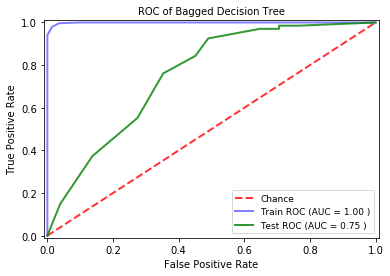

In [90]:
BG_DT = BaggingClassifier(random_state=0)

models = []
models.append(('Bagged Decision Tree', BG_DT))

fit_predict(scaled_train, scaled_test, y_train, y_test,models)

#### The accuracy for test set increased by 1 % , still it could be an overfit


 Train classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       288

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429


 Test classification report:
               precision    recall  f1-score   support

           0       0.75      0.41      0.53        51
           1       0.81      0.95      0.87       134

    accuracy                           0.80       185
   macro avg       0.78      0.68      0.70       185
weighted avg       0.79      0.80      0.78       185


 Train confusion matrix:
 [[141   0]
 [  0 288]]

 Test confusion matrix:
 [[ 21  30]
 [  7 127]]


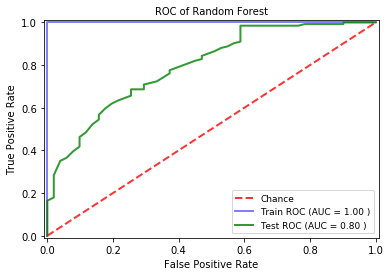

In [91]:
RF = RandomForestClassifier(random_state=0)

models = []
models.append(('Random Forest', RF))

fit_predict(scaled_train, scaled_test, y_train, y_test,models)

### Two bagging models as bagged Decision Tree and Random Forest are built
- Random Forest provides best accuracy then the bagged decision tree
- Still it has some amount of variance, so further hyper parameter tuning cound be used

## Hyperparameter tuning

In [146]:
# Number of trees in random forest
n_estimators = np.arange(10,50,10)

# Maximum number of levels in tree
max_depth =  np.arange(2,9,2)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 7,9]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 4, 5]

# criteria for finding the best starting node
criterion = ['gini','entropy']

rf_params = {'n_estimators': n_estimators, 'criterion':criterion, 
             'max_depth': max_depth, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split }

rfparam, rfestimator, rfscore, results = random_search_cv(X_train,y_train,RF,rf_params)

print(rfparam)

{'n_estimators': 20, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_depth': 8, 'criterion': 'gini'}



 Train classification report:
               precision    recall  f1-score   support

           0       0.93      0.53      0.68       141
           1       0.81      0.98      0.89       288

    accuracy                           0.83       429
   macro avg       0.87      0.76      0.78       429
weighted avg       0.85      0.83      0.82       429


 Test classification report:
               precision    recall  f1-score   support

           0       0.78      0.41      0.54        51
           1       0.81      0.96      0.88       134

    accuracy                           0.81       185
   macro avg       0.79      0.68      0.71       185
weighted avg       0.80      0.81      0.78       185


 Train confusion matrix:
 [[ 75  66]
 [  6 282]]

 Test confusion matrix:
 [[ 21  30]
 [  6 128]]


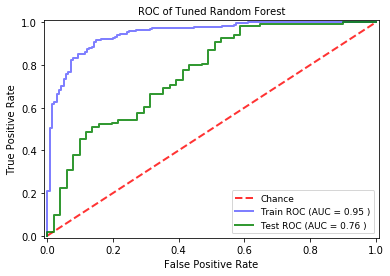

In [147]:
tuned_RF = rfestimator

models = [('Tuned Random Forest', tuned_RF)]

fit_predict(X_train, X_test, y_train, y_test, models)

### Implementing the final model

In [101]:
X = train.drop(['data','Loan_Status','Loan_ID'],axis = 1)

Y = train['Loan_Status']

X_scaled = std_all_data(X)

In [102]:

RF = RandomForestClassifier(criterion='gini', n_estimators= 20, min_samples_split = 7, 
                            min_samples_leaf = 4, max_depth = 8, random_state=0)


In [103]:
models = []
models.append(('RandomForest',RF))

In [116]:
acc_score = []
names = []
final = {}
for name,model in models:
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_validate(model,X_scaled,Y,cv=kfold,scoring='accuracy')
    names.append(name)
    acc_score.append(np.mean(cv_results['test_score']))

In [117]:
final.update({'Model':names , 'Accuracy':acc_score})

In [118]:
pd.DataFrame(final)

,Model,Accuracy
0,RandomForest,0.806121


In [119]:
RF.fit(X_scaled,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [133]:
y_pred = RF.predict(test)

In [141]:
loanid = df[df['data']=='test']['Loan_ID']

d = {'Loan_ID': loanid, 'Loan_Status': y_pred}

pred_val = pd.DataFrame(d)
pred_val['Loan_Status'] = pred_val['Loan_Status'].replace({0:'N',1:'Y'})

In [143]:
pred_val.to_csv('E:\Data Science\Competitions\Projects\LoanPrediction\loan_pred_solution_final.csv',index=False)